In [398]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos DataSet y hacemos un analisis descriptivo
La idea es ver las columnas, tipo de datos, cantidad de nulos por variable

In [399]:
# Levante dataset
data_location = "properati.csv"
data = pd.read_csv(data_location, sep=",")
print("SHAPE : ",data.shape)
data.head(2)

SHAPE :  (121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


Tipos de la columna:
* Operación del aviso (sell, rent) 
* Tipo de la propiedad (house, apartment, ph) 
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* (falta pais en pdf)
* (falta provincia en pdf)
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* (lat y Long por separado en csv)
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m2
* Superficie cubierta en m2
* Precio en USD/m2
* Precio por m2
* N° de piso, si corresponde
* Ambientes
* (expensas en csv)
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer 
* (Fecha de creación falta en csv)

In [400]:
# Tipo de datos por columna
print(data.dtypes)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [401]:
# Porcentaje de valores nulos por columna
porc_nulos_por_campo = (np.round(100 * data.isnull().sum() / data.shape[0],2)).sort_values(ascending=False)
print(porc_nulos_por_campo)

floor                         93.48
expenses                      88.23
rooms                         60.91
price_usd_per_m2              43.39
lon                           42.53
lat-lon                       42.53
lat                           42.53
surface_total_in_m2           32.44
price_per_m2                  27.69
currency                      16.84
price_aprox_usd               16.84
price_aprox_local_currency    16.84
price                         16.84
surface_covered_in_m2         16.42
geonames_id                   15.44
image_thumbnail                2.57
place_name                     0.02
title                          0.00
properati_url                  0.00
description                    0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
operation                      0.00
Unnamed: 0                     0.00
dtype: float64


### Vamos a analizar primero los valores faltantes en place_name por ser el que menor cantidad de datos nulos presenta dentro los q tienen datos faltantes
Adicionalmente normalizamos la columna place_name con la tercer locacion (departamento/ciudad) de la provincia/region correspondiente

In [402]:
mascara_lugar=(data.place_name.isnull()==True)
data[mascara_lugar]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,340.0,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,220.0,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,294.0,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,270.0,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,550.0,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,27.0,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente 

In [403]:
# De columna place_with_parent_names, toma el departamento o provincia (ATENTO. TAL VEZ HAY QUE CORREGIR)
provincia = data["place_with_parent_names"].apply(lambda x: x if x in (np.NaN,None,np.nan) else x.split("|"))
provincia2 = provincia.apply(lambda x: x[2] if len(x) < 5 else x[3])
provincia2.value_counts()
print(provincia2.isnull().sum())
data["provincia_clean"] = provincia2

0


In [404]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'provincia_clean'],
      dtype='object')

## Normalizar a dolares todos los precios tanto precio total como precio/m2

In [405]:
# Tipos de divisas y cantidad de cada una
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [406]:
# Visualiza precios y precios aproximados en dolares de Pesos Peruanoss
data.loc[data.currency == "PEN",["currency",'price','price_aprox_usd','price_usd_per_m2','price_per_m2']]

,currency,price,price_aprox_usd,price_usd_per_m2,price_per_m2
50387,PEN,380000.0,117139.33,NaN,NaN
50388,PEN,950000.0,292848.33,NaN,NaN


In [407]:
# Visualiza precios y precios aproximados en dolares de Pesos Uruguayos
data.loc[data.currency=="UYU",["currency",'price','price_aprox_usd','price_usd_per_m2','price_per_m2','provincia_clean']]

,currency,price,price_aprox_usd,price_usd_per_m2,price_per_m2,provincia_clean
107390,UYU,650000000.0,22980378.29,NaN,NaN,San Roque


In [408]:
# Visualiza tipos de operaciones y cantidades de cada tipo 
# Hay un unico tipo de operacion
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

In [409]:
# Nuevo dataframe con las columnas indicadas
data_limpio=data.loc[:,['Unnamed: 0', 'property_type',
        'country_name', 'state_name','provincia_clean','price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses','description', 'title',]]

In [410]:
data_limpio["price_clean"]=data_limpio["price"]
data_limpio["price_usd/m2_clean"]=data_limpio['price_per_m2']

In [411]:
data_limpio['price_usd_per_m2'].isnull().sum()

52603

In [412]:
data_limpio['price_per_m2'].isnull().sum()

33562

In [413]:
data_limpio["price_usd/m2_clean"].isnull().sum()

33562

In [414]:
# Busca precio medio del dolar usado en el dataset
mask = (data_limpio["currency"] == "ARS") & (data_limpio['price_aprox_usd'] > 0) & (data_limpio['price'] > 0)
data_limpio[mask]
conversion_dolar = (data_limpio.loc[mask,"price"] / data_limpio.loc[mask,'price_aprox_usd']).mean()
print(conversion_dolar)
print("Desvio std: ",(data_limpio.loc[mask,"price"] / data_limpio.loc[mask,'price_aprox_usd']).std())

17.81418267541341
Desvio std:  0.10231637893152422


In [415]:
# Funcion para convertir de ARS a USD
def conversion(fila):
    if not np.isnan(fila['price_aprox_usd']):
        return fila['price_aprox_usd']
    elif (fila['currency'] == "ARS") & (not np.isnan(fila['price'])):
          return fila['price'] / conversion_dolar
    else:
          return fila['price']

In [416]:
# Convierte a USD todos los precios que no esten en dolares
mask = data_limpio["currency"] != "USD"
data_limpio.loc[mask,"price_clean"] = data_limpio[mask].apply(conversion,axis=1)

In [417]:
# Funcion para convertir precio/m2 de ARS a USD
def conversion2(fila):
    if not np.isnan(fila['price_usd_per_m2']):
        return fila['price_usd_per_m2']
    elif (fila['currency'] == "ARS") & (not np.isnan(fila['price_per_m2'])):
          return fila['price_per_m2'] / conversion_dolar
    else:
          return fila['price_per_m2']

In [418]:
# Convierte a USD todos los precios/m2
mask = data_limpio["currency"] != "USD"
data_limpio.loc[mask,"price_usd/m2_clean"] = data_limpio[mask].apply(conversion2,axis=1)

In [419]:
#Verificacion entre cantidad de filas con precio y cantidad de filas con tipo de moneda
print(data_limpio["price_clean"].isnull().sum())
print(data_limpio["currency"].isnull().sum())

20410
20411


In [420]:
#Verificacion entre cantidad datos con precio/m2 y cantidad de datos con precio dolar/m2
print(data_limpio['price_per_m2'].isnull().sum())
print(data_limpio["price_usd/m2_clean"].isnull().sum())

33562
32635


In [421]:
#Evaluamos la diferencia q tiene que coincidir con el analisis q hacemos en el Data_Frame CCC con su cantidad de filas
diferencia_Datos=data_limpio['price_per_m2'].isnull().sum() - data_limpio["price_usd/m2_clean"].isnull().sum()
print(diferencia_Datos)

927


In [422]:
CCC=data_limpio[(data_limpio['price_usd_per_m2'].notnull()) & (data_limpio['price_per_m2'].isnull())]

In [423]:
CCC[CCC["currency"]=="ARS"].head(3)


,Unnamed: 0,property_type,country_name,state_name,provincia_clean,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,price_clean,price_usd/m2_clean
168,168,house,Argentina,Santa Fe,Reconquista,2500000.0,ARS,2473921.05,140209.19,195.0,NaN,719.021487,NaN,NaN,NaN,NaN,Casa en Bº Sarmiento de la ciudad de Reconquis...,Casa Bº Sarmiento,140209.19,719.021487
424,424,apartment,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,1478400.0,ARS,1521648.97,86239.28,43.0,NaN,2005.564651,NaN,NaN,2.0,NaN,LANZAMIENTO. Venta desde el pozo. BEGAL IV. Se...,Departamento venta,86239.28,2005.564651
471,471,apartment,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,875750.0,ARS,866614.38,49115.27,38.0,NaN,1292.507105,NaN,NaN,1.0,NaN,Dpto. UN Amb. Superficie 38 m2 Amplio con ba...,departamento a estrenar,49115.27,1292.507105


In [424]:
#Hacemos la verificacion
CCC[CCC["currency"]=="ARS"].shape[0] == diferencia_Datos

True

In [425]:
#Para la diferencia q nos aparecio entre price_clean y currency buscamos cual es la fila q tiene el problema
data[(data_limpio["price_clean"].notnull()) & (data_limpio["currency"].isnull())]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,provincia_clean
9761,9761,sell,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,"4.5458426,-75.67893099",4.545843,...,NaN,NaN,2.0,3.0,NaN,http://www.properati.com.ar/165i3_venta_casa_c...,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR,https://thumbs4.properati.com/2/2huBKPZv0RyWda...,Córdoba


In [426]:
#Como la fila detectada no aporta ninun dato la eliminamos
data_limpio=data_limpio.drop(index=9761)

In [427]:
data_limpio["price_clean"].isnull().sum() == data_limpio["currency"].isnull().sum()

True

In [428]:
data_limpio.columns

Index(['Unnamed: 0', 'property_type', 'country_name', 'state_name',
       'provincia_clean', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'description', 'title', 'price_clean', 'price_usd/m2_clean'],
      dtype='object')

In [429]:
#Renombramos price clean a price clean USD
data_limpio.rename(columns={'price_clean':'price_clean_USD'},inplace=True)

In [430]:
data_limpio.columns

Index(['Unnamed: 0', 'property_type', 'country_name', 'state_name',
       'provincia_clean', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'description', 'title', 'price_clean_USD', 'price_usd/m2_clean'],
      dtype='object')

In [431]:
#Debido a las normalizaciones hechas a dolares podemos eliminar todas estas columnas
data_limpio=data_limpio.drop(columns=['currency', 'price_aprox_local_currency','price_aprox_usd','floor','expenses',"price_usd_per_m2","price_per_m2","price"])
#
#
#

In [432]:
data_limpio.head(2)

,Unnamed: 0,property_type,country_name,state_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
0,0,PH,Argentina,Capital Federal,Mataderos,55.0,40.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,1550.0
1,1,apartment,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,150000.0,NaN


In [433]:
porc_nulos_por_campo = (np.round(100 * data_limpio.isnull().sum() / data_limpio.shape[0],2)).sort_values(ascending=False)
print(porc_nulos_por_campo)

rooms                    60.91
surface_total_in_m2      32.44
price_usd/m2_clean       26.92
price_clean_USD          16.84
surface_covered_in_m2    16.42
title                     0.00
description               0.00
provincia_clean           0.00
state_name                0.00
country_name              0.00
property_type             0.00
Unnamed: 0                0.00
dtype: float64


## Porcentaje de valores nulos por provincia

In [434]:
# Toma valores unicos de provincias
lista_provincias = data_limpio["state_name"].unique()
lista_provincias

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [435]:
# Funcion que devuelve un df fila con porcentaje de valores nulos por columna
def contar_nulos(data, provincia):
    tmp = data.isnull().sum() / data.shape[0]
    columnas = [x for x in tmp.index]
    valores = [x for x in tmp.values]
    diccionario = dict(zip(columnas, valores))
    return pd.DataFrame(diccionario, index = [provincia])

In [436]:
data_limpio.columns

Index(['Unnamed: 0', 'property_type', 'country_name', 'state_name',
       'provincia_clean', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'price_clean_USD',
       'price_usd/m2_clean'],
      dtype='object')

In [437]:
# Crea df donde se visualizan porcentaje de valores nulos por columna 
data_nulos_porcentual = pd.DataFrame(columns = data_limpio.columns)
for p in lista_provincias:
    mask_p = data_limpio["state_name"] == p
    data_nulos_porcentual = data_nulos_porcentual.append(contar_nulos(data_limpio[mask_p], p))
    
data_nulos_porcentual

,Unnamed: 0,property_type,country_name,state_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
Capital Federal,0.0,0.0,0.0,0.0,0.0,0.181922,0.072379,0.525777,0.000000,0.0,0.102055,0.154227
Bs.As. G.B.A. Zona Sur,0.0,0.0,0.0,0.0,0.0,0.490467,0.215883,0.793291,0.000000,0.0,0.133816,0.288776
Buenos Aires Costa Atlántica,0.0,0.0,0.0,0.0,0.0,0.301919,0.246952,0.235858,0.000000,0.0,0.094643,0.306516
Entre Ríos,0.0,0.0,0.0,0.0,0.0,0.300813,0.308943,0.756098,0.000000,0.0,0.647696,0.734417
Bs.As. G.B.A. Zona Norte,0.0,0.0,0.0,0.0,0.0,0.266158,0.069327,0.728482,0.000039,0.0,0.058764,0.118388
Santa Fe,0.0,0.0,0.0,0.0,0.0,0.323339,0.274774,0.677055,0.000000,0.0,0.467853,0.504915
Córdoba,0.0,0.0,0.0,0.0,0.0,0.582035,0.286792,0.677826,0.000083,0.0,0.251160,0.441415
Bs.As. G.B.A. Zona Oeste,0.0,0.0,0.0,0.0,0.0,0.350461,0.148251,0.486162,0.000000,0.0,0.213366,0.326861
Misiones,0.0,0.0,0.0,0.0,0.0,0.366379,0.446121,0.474138,0.000000,0.0,0.250000,0.437500
Buenos Aires Interior,0.0,0.0,0.0,0.0,0.0,0.406373,0.223047,0.589699,0.000000,0.0,0.208206,0.364033


In [438]:
# Analizamos el df y encontramos que hay columnas que cuentan con todos los datos, 
# por los que las dropearemos de este df donde queremos analizar los valores nulos
columnas_sumadas = data_nulos_porcentual.sum()
columnas_sumadas

Unnamed: 0                0.000000
property_type             0.000000
country_name              0.000000
state_name                0.000000
provincia_clean           0.000000
surface_total_in_m2      11.542146
surface_covered_in_m2    10.131954
rooms                    18.318214
description               0.000122
title                     0.000000
price_clean_USD           9.937469
price_usd/m2_clean       13.212913
dtype: float64

In [439]:
# Dropeamos las columnas que no tienen ningun valor nulo y ordenamos el df por price_clean
data_nulos_porcentual_clean = data_nulos_porcentual.drop(
    columns = ["title", "Unnamed: 0", "property_type", "country_name", 
               "state_name", "provincia_clean", "description"])
data_nulos_porcentual_clean = data_nulos_porcentual_clean.sort_values(by = "price_clean_USD")

In [440]:
# Al df de analisis de porcentaje de valores nulos, le agregamos una nueva columna en la que se indica
# la cantidad existentes para cada provincia
data_nulos_porcentual_clean_amount = data_nulos_porcentual_clean.join(
    data_limpio["state_name"].value_counts())

data_nulos_porcentual_clean_amount = data_nulos_porcentual_clean_amount.rename(
    columns = {"state_name":"cantidad_datos"})

data_nulos_porcentual_clean_amount.sort_values(by ="cantidad_datos",ascending=False)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.181922,0.072379,0.525777,0.102055,0.154227,32316
Bs.As. G.B.A. Zona Norte,0.266158,0.069327,0.728482,0.058764,0.118388,25560
Bs.As. G.B.A. Zona Sur,0.490467,0.215883,0.793291,0.133816,0.288776,13952
Córdoba,0.582035,0.286792,0.677826,0.251160,0.441415,12068
Santa Fe,0.323339,0.274774,0.677055,0.467853,0.504915,10172
Buenos Aires Costa Atlántica,0.301919,0.246952,0.235858,0.094643,0.306516,10006
Bs.As. G.B.A. Zona Oeste,0.350461,0.148251,0.486162,0.213366,0.326861,9322
Buenos Aires Interior,0.406373,0.223047,0.589699,0.208206,0.364033,2291
Río Negro,0.587871,0.418317,0.580446,0.553218,0.731436,808
Neuquén,0.349250,0.291951,0.510232,0.557981,0.612551,733


In [441]:
data_limpio.head(3)

,Unnamed: 0,property_type,country_name,state_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
0,0,PH,Argentina,Capital Federal,Mataderos,55.0,40.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,1550.000000
1,1,apartment,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,150000.0,NaN
2,2,apartment,Argentina,Capital Federal,Mataderos,55.0,55.0,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,72000.0,1309.090909


In [442]:
# Creamos una funcion que realice exactamente lo hecho arriba para poder realizar comparaciones
def crear_tablas_porcentual_nulos(data):
    lista_provincias = data["state_name"].unique()
    data_nulos_porcentual = pd.DataFrame(columns = data.columns)
    for p in lista_provincias:
        mask_p = data["state_name"] == p
        data_nulos_porcentual = data_nulos_porcentual.append(contar_nulos(data[mask_p], p))
    data_nulos_porcentual_clean = data_nulos_porcentual.drop(
    columns = ["title", "Unnamed: 0", "property_type", "country_name", 
               "state_name", "provincia_clean", "description"])
    data_nulos_porcentual_clean = data_nulos_porcentual_clean.sort_values(by = "price_clean_USD")
    data_nulos_porcentual_clean_amount = data_nulos_porcentual_clean.join(
    data["state_name"].value_counts())

    data_nulos_porcentual_clean_amount = data_nulos_porcentual_clean_amount.rename(
        columns = {"state_name":"cantidad_datos"})

    return data_nulos_porcentual_clean_amount.sort_values(by ="cantidad_datos",ascending=False)

## Análisis y eliminación de datos duplicados
Viendo los datos de la provincia de Formosa, encontramos que había gran cantidad de datos repetidos entre aquellas propiedades que contaban con precio en USD, superficie total y precio aproximado en USD por m2

In [443]:
# Obtenemos df con state_name Formosa y que cuente con los valores de price_clean_USD
df_formosa_precio = data_limpio[(data_limpio["state_name"] == "Formosa") & (data_limpio["price_clean_USD"].notnull())]
df_formosa_precio.head(3)

,Unnamed: 0,property_type,country_name,state_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
88710,88710,apartment,Argentina,Formosa,Formosa,64.0,NaN,NaN,FREEDOM - 1 DORMITORIO 64 mt2Pisos de porcelan...,Departamento - Formosa,96912.59,1514.259219
88904,88904,apartment,Argentina,Formosa,Formosa,100.0,NaN,NaN,"Pisos de porcelanato, cocina completa, pileta ...",Departamento - Formosa,151266.59,1512.665900
89147,89147,apartment,Argentina,Formosa,Formosa,100.0,NaN,NaN,"Pisos de porcelanato, cocina completa, pileta ...",Departamento - Formosa,151266.59,1512.665900


In [444]:
# Vemos los valores de Formosa con precio y cuanto de esos estan repetidos
formosa_con_precio = df_formosa_precio.shape[0]
formosa_con_precio_duplicados = df_formosa_precio.duplicated(["price_clean_USD","surface_total_in_m2", "surface_covered_in_m2", "description", "title"], keep="first").sum()
print(f"Cantidad de datos de Formosa con price_clean_USD: {formosa_con_precio}")
print(f"Cantidad de datos de Formosa con price_clean_USD repetidos: {formosa_con_precio_duplicados}")

Cantidad de datos de Formosa con price_clean_USD: 29
Cantidad de datos de Formosa con price_clean_USD repetidos: 25


In [445]:
# Eliminamos del dataset los datos duplicados. Consideramos que un dato esta duplicado cuando tiene el mismo property_type, misma ubicacion, mismas superficier y precio
print(f"Tamaño del dataset con duplicados: {data_limpio.shape}")
data_limpio_sin_duplicados = data_limpio.drop_duplicates(['property_type', 'country_name', 'state_name', 'provincia_clean', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_clean_USD'], keep="first")
print(f"Tamaño del dataset sin duplicados: {data_limpio_sin_duplicados.shape}")

Tamaño del dataset con duplicados: (121219, 12)
Tamaño del dataset sin duplicados: (96784, 12)


In [446]:
# Vemos la nueva tabla de los porcentajes de valores nulos
crear_tablas_porcentual_nulos(data_limpio_sin_duplicados)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.194528,0.064217,0.506082,0.061943,0.117027,27703
Bs.As. G.B.A. Zona Norte,0.264736,0.061585,0.735310,0.038323,0.096339,21580
Bs.As. G.B.A. Zona Sur,0.433306,0.134648,0.798343,0.085022,0.207692,11103
Córdoba,0.511846,0.191775,0.669312,0.164059,0.307443,8948
Buenos Aires Costa Atlántica,0.252774,0.187476,0.238873,0.077924,0.249075,7841
Bs.As. G.B.A. Zona Oeste,0.306170,0.107654,0.466024,0.181854,0.278834,7682
Santa Fe,0.256397,0.140396,0.645172,0.208120,0.260321,5862
Buenos Aires Interior,0.388434,0.190843,0.584578,0.182651,0.331566,2075
Río Negro,0.443636,0.285455,0.656364,0.376364,0.623636,550
Corrientes,0.392638,0.108384,0.991820,0.143149,0.237219,489


In [447]:
# Finalmente igualamos data_limpio_sin_duplicados a data_limpio para seguir trabajando con ese nombre de df
data_limpio = data_limpio_sin_duplicados

In [448]:
# Ademas, decidimos eliminar los datos de las provincias de La Rioja y Santiago del Estero debido a que cuentan con muy pocos datos. 
# Tambien Formosa, ya que solo contamos con 4 datos de precio de entre los 17 que tiene
data_limpio = data_limpio.set_index("state_name").drop(["La Rioja", "Santiago Del Estero", "Formosa"], axis = "index").reset_index()
data_limpio["state_name"].value_counts()

Capital Federal                 27703
Bs.As. G.B.A. Zona Norte        21580
Bs.As. G.B.A. Zona Sur          11103
Córdoba                          8948
Buenos Aires Costa Atlántica     7841
Bs.As. G.B.A. Zona Oeste         7682
Santa Fe                         5862
Buenos Aires Interior            2075
Río Negro                         550
Corrientes                        489
Mendoza                           487
Tucumán                           477
Neuquén                           422
Misiones                          373
Entre Ríos                        310
Chubut                            240
San Luis                          229
Salta                             133
La Pampa                          102
Chaco                              47
Tierra Del Fuego                   31
Catamarca                          22
San Juan                           20
Santa Cruz                         20
Jujuy                              13
Name: state_name, dtype: int64

In [449]:
# Elimino las propiedades en las que tenemos nulos los valores de todas las columnas indicadas
data_limpio = data_limpio.dropna(subset = ["surface_total_in_m2", "surface_covered_in_m2", "price_clean_USD", "price_usd/m2_clean"], how="all", axis="index")

In [450]:
# Imprimimos los valores porcentuales nulos
crear_tablas_porcentual_nulos(data_limpio)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.192546,0.061914,0.505880,0.059635,0.114854,27635
Bs.As. G.B.A. Zona Norte,0.264020,0.060671,0.735563,0.037386,0.095459,21559
Bs.As. G.B.A. Zona Sur,0.431566,0.131990,0.798627,0.082212,0.205258,11069
Córdoba,0.508772,0.186685,0.669028,0.158794,0.303081,8892
Buenos Aires Costa Atlántica,0.250000,0.184460,0.237583,0.074501,0.246288,7812
Bs.As. G.B.A. Zona Oeste,0.303814,0.104624,0.464864,0.179075,0.276385,7656
Santa Fe,0.248059,0.130757,0.646541,0.199241,0.252027,5797
Buenos Aires Interior,0.378550,0.177767,0.583252,0.169442,0.320764,2042
Río Negro,0.433333,0.272222,0.657407,0.364815,0.616667,540
Corrientes,0.387629,0.101031,0.991753,0.136082,0.230928,485


## Analisis preliminar si los precios/m2 que aparecen en el data se relacionan con superficie cubierta o con superficie total

In [564]:
Comparativa=pd.DataFrame(data_limpio.loc[:,"price_clean_USD"]/data_limpio.loc[:,"price_usd/m2_clean"],columns=["precios"])

In [565]:
Comparativa.head(3)

,precios
0,40.0
1,NaN
2,55.0


In [452]:
Comparativa["surface_total_in_m2"]=data_limpio["surface_total_in_m2"]

In [453]:
Comparativa["surface_covered_in_m2"]=data_limpio["surface_covered_in_m2"]

In [454]:
Comparativa["suma_SUP_TOTAL"]=np.abs(Comparativa["precios"]-data_limpio["surface_total_in_m2"])<5

In [455]:
Comparativa["suma_SUP_CUB"]=np.abs(Comparativa["precios"]-data_limpio["surface_covered_in_m2"])<5

In [456]:
Comparativa["property_type"]=data_limpio["property_type"]

In [457]:
Comparativa["suma_SUP_TOTAL"].sum()

28841

In [458]:
Comparativa["suma_SUP_CUB"].sum()

73816

In [459]:
Comparativa[(Comparativa["suma_SUP_TOTAL"]==True) & (Comparativa["suma_SUP_CUB"]==False)].shape

(4366, 6)

In [460]:
Comparativa["suma_SUP_TOTAL"].sum()-Comparativa[(Comparativa["suma_SUP_TOTAL"]==True) & (Comparativa["suma_SUP_CUB"]==True)].shape[0]

4366

## Imputacion de datos por regla de 3 simple
En este punto vamos a usar la info recolectada arriba que arrojo que en mas del doble de los casos que cuentan con la superficie el valor usado para relacionar con el precio es la Cubierta

In [461]:
# Evaluo aquellos registros donde cuento con ambos precios pero no con metros cubiertos
contador=(data_limpio.price_clean_USD.notnull()) & (data_limpio["price_usd/m2_clean"]>0) & (data_limpio.surface_covered_in_m2.isnull())
contador.sum()

827

In [462]:
data_limpio.loc[contador,"surface_covered_in_m2"]=data_limpio.loc[contador,"price_clean_USD"]/data_limpio.loc[contador,"price_usd/m2_clean"]

In [463]:
#Para todos los departamentos asigno q la sup total es igual a la cubirta
contador=(data_limpio.property_type == "apartment") & (data_limpio.surface_total_in_m2>0) & (data_limpio.surface_covered_in_m2.isnull())
contador.sum()

2721

In [464]:
data_limpio.loc[contador,"surface_covered_in_m2"]=data_limpio.loc[contador,"surface_total_in_m2"]

In [465]:
#lo inverso a lo anterior
contador=(data_limpio.property_type == "apartment") & (data_limpio.surface_total_in_m2.isnull()) & (data_limpio.surface_covered_in_m2>0)
contador.sum()
data_limpio.loc[contador,"surface_total_in_m2"]=data_limpio.loc[contador,"surface_covered_in_m2"]

In [466]:
#En los casos donde tengo precio y metros voy a calcular los UDS/m2
contador=(data_limpio.surface_covered_in_m2>0) & (data_limpio["price_usd/m2_clean"].isnull()) & (data_limpio["price_clean_USD"].notnull())
contador.sum()


2183

In [467]:
data_limpio.loc[contador,"price_usd/m2_clean"]=data_limpio.loc[contador,"price_clean_USD"]/data_limpio.loc[contador,"surface_covered_in_m2"]

## Evaluar posible influencia del tipo de vivienda en la forma de tomar sup total o sup cubierta para definir el precio del inmueble

In [468]:
mask=(Comparativa["suma_SUP_TOTAL"]==True) & (Comparativa["suma_SUP_CUB"]==False)

In [469]:
Comparativa.loc[mask,"property_type"].value_counts()

apartment    3455
house         800
store          61
PH             50
Name: property_type, dtype: int64

In [470]:
mask2=(Comparativa["suma_SUP_CUB"]==True)

In [471]:
Comparativa.loc[mask2,"property_type"].value_counts()

apartment    41825
house        25396
PH            4243
store         2352
Name: property_type, dtype: int64

## Gráficos de dispersión
La idea es analizar si creamos regiones para las provincias con pocos datos

### Análisis por regiones para unir datos de provincias

In [472]:
lista_prov = ["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Oeste", "Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe","Cordoba"]

In [473]:
# Tomo solo los datos de las provincias indicadas en lista_prov
msk_prov = []
for x in data_limpio["state_name"]:
    if x in lista_prov:
        msk_prov.append(True)
    else:
        msk_prov.append(False)

data_limpio_prov = data_limpio[msk_prov]    

In [474]:
msk_prov2=[x in lista_prov for x in data_limpio["state_name"]]

In [475]:
# Elimino outliers 
data_limpio_sin_outlier = data_limpio[(data_limpio["price_clean_USD"]>20000) & (data_limpio["price_clean_USD"]< 500000) & (data_limpio["surface_covered_in_m2"]>15)]

In [476]:
lista_prov = ["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Oeste", "Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe","Cordoba"]

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


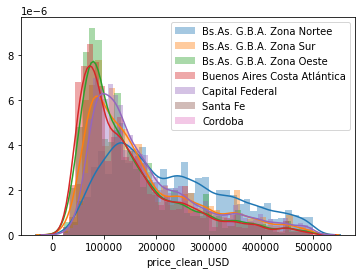

In [477]:
# Histogramas de las provincias de lista prov de interes, eliminando outliers 

msk_BAZN = data_limpio_sin_outlier["state_name"] == "Bs.As. G.B.A. Zona Norte"
msk_BAZS = data_limpio_sin_outlier["state_name"] == "Bs.As. G.B.A. Zona Sur"
msk_BAZO = data_limpio_sin_outlier["state_name"] == "Bs.As. G.B.A. Zona Oeste"
msk_BACA = data_limpio_sin_outlier["state_name"] == "Buenos Aires Costa Atlántica"
msk_CABA = data_limpio_sin_outlier["state_name"] == "Capital Federal"
msk_STF = data_limpio_sin_outlier["state_name"] == "Santa Fe "
msk_CORD = data_limpio_sin_outlier["state_name"] == "Cordoba"

sns.distplot(data_limpio_sin_outlier.loc[msk_BAZN, "price_clean_USD"], label = "Bs.As. G.B.A. Zona Nortee")
sns.distplot(data_limpio_sin_outlier.loc[msk_BAZS, "price_clean_USD"], label = "Bs.As. G.B.A. Zona Sur")
sns.distplot(data_limpio_sin_outlier.loc[msk_BAZO, "price_clean_USD"], label = "Bs.As. G.B.A. Zona Oeste")
sns.distplot(data_limpio_sin_outlier.loc[msk_BACA, "price_clean_USD"], label = "Buenos Aires Costa Atlántica")
sns.distplot(data_limpio_sin_outlier.loc[msk_CABA, "price_clean_USD"], label = "Capital Federal")
sns.distplot(data_limpio_sin_outlier.loc[msk_STF, "price_clean_USD"], label = "Santa Fe")
sns.distplot(data_limpio_sin_outlier.loc[msk_CORD, "price_clean_USD"], label = "Cordoba")
plt.legend()

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


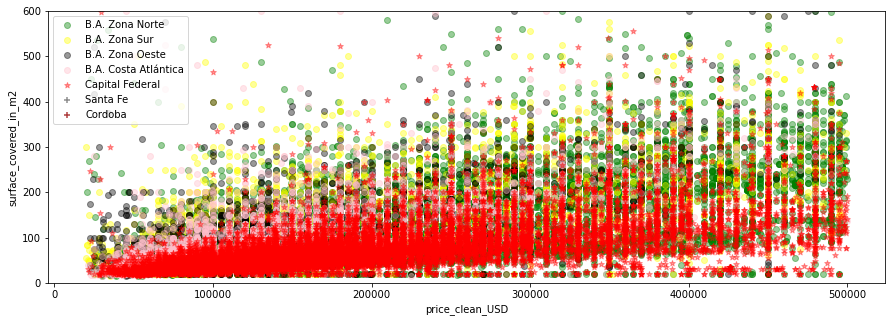

In [478]:
fig = plt.figure(figsize = (15, 5))

ax = plt.axes()
ax.scatter(data_limpio_sin_outlier.loc[msk_BAZN, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_BAZN, "surface_covered_in_m2"], marker = 'o', color = "green", label='B.A. Zona Norte', alpha = 0.4)
ax.scatter(data_limpio_sin_outlier.loc[msk_BAZS, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_BAZS, "surface_covered_in_m2"], marker = 'o', color = "yellow", label='B.A. Zona Sur', alpha = 0.4)
ax.scatter(data_limpio_sin_outlier.loc[msk_BAZO, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_BAZO, "surface_covered_in_m2"], marker = 'o', color = "black", label='B.A. Zona Oeste', alpha = 0.4)
ax.scatter(data_limpio_sin_outlier.loc[msk_BACA, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_BACA, "surface_covered_in_m2"], marker = 'o', color = "pink", label='B.A. Costa Atlántica', alpha = 0.4)
ax.scatter(data_limpio_sin_outlier.loc[msk_CABA, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_CABA, "surface_covered_in_m2"], marker = '*', color = "red", label='Capital Federal', alpha = 0.4)
ax.scatter(data_limpio_sin_outlier.loc[msk_STF, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_STF, "surface_covered_in_m2"], marker = '+', color = "grey", label='Santa Fe', alpha = 0.9)
ax.scatter(data_limpio_sin_outlier.loc[msk_CORD, "price_clean_USD"], data_limpio_sin_outlier.loc[msk_CORD, "surface_covered_in_m2"], marker = '+', color = "brown", label='Cordoba', alpha = 0.9)
ax.set_xlabel("price_clean_USD")
ax.set_ylabel("surface_covered_in_m2")
ax.set_ylim(ymin = 0, ymax = 600)
plt.legend()
fig.show()

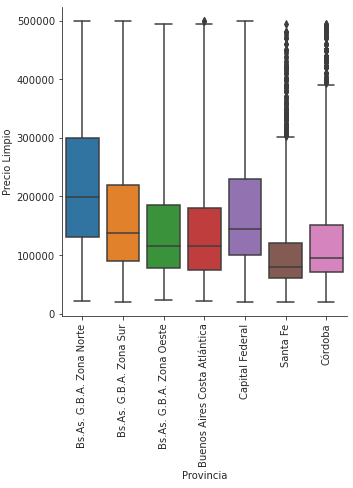

In [479]:
# Box plot de precios de las regiones de interes
with sns.axes_style(style='ticks'):
    g = sns.catplot("state_name", "price_clean_USD", 
                    data = data_limpio_sin_outlier.set_index(data_limpio_sin_outlier.state_name).loc[
                        ["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe","Córdoba"]], 
                    kind ="box", orient = "v", height = 5, whis = 3)
    g.set_axis_labels("Provincia", "Precio Limpio");
    g.set_xticklabels(rotation=90)

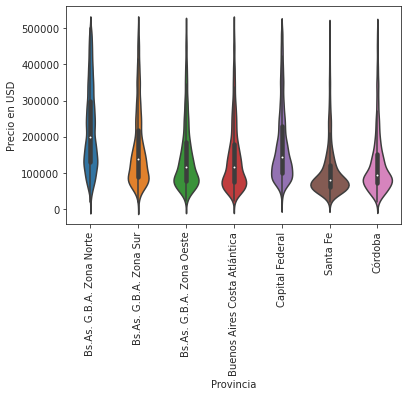

In [480]:
# Box plot de precios de las regiones de interes
with sns.axes_style(style='ticks'):
    g = sns.violinplot("state_name", "price_clean_USD", 
                    data = data_limpio_sin_outlier.set_index(data_limpio_sin_outlier.state_name).loc[
                        ["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe","Córdoba"]], 
                    kind ="box", orient = "v", height = 5, whis = 3)
    pp=["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe","Córdoba"]
    g.set_xticklabels(pp,rotation=90)
    g.set(xlabel="Provincia", ylabel="Precio en USD")

In [481]:
# Ordeno las provincias segun la mediana de los precios
p_sur = ["Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Sur","Córdoba","Bs.As. G.B.A. Zona Oeste", "Buenos Aires Costa Atlántica", "Capital Federal", "Santa Fe"]
mediana_precios_provincia_sort = data_limpio.groupby("state_name")["price_clean_USD"].median().sort_values()
mediana_precios_provincia_sort

state_name
Santa Fe                         81882.160
Misiones                         85000.000
Tucumán                          86929.690
La Pampa                         86929.695
Salta                            95454.570
Entre Ríos                       98987.685
Córdoba                         100000.000
Buenos Aires Costa Atlántica    115000.000
Bs.As. G.B.A. Zona Oeste        120000.000
Tierra Del Fuego                123384.080
Mendoza                         128500.000
San Luis                        128992.450
Neuquén                         130000.000
Buenos Aires Interior           135000.000
Jujuy                           139648.350
Bs.As. G.B.A. Zona Sur          140000.000
Chaco                           140209.190
Santa Cruz                      140209.190
Río Negro                       155000.000
Corrientes                      155000.000
Capital Federal                 160000.000
Chubut                          200000.000
Bs.As. G.B.A. Zona Norte        234722.000


In [482]:
# Creo lista ordenada de las provincias de lista p_sur
p_sur = [x for x in mediana_precios_provincia_sort.index if x in p_sur]
p_sur

['Santa Fe',
 'Córdoba',
 'Buenos Aires Costa Atlántica',
 'Bs.As. G.B.A. Zona Oeste',
 'Bs.As. G.B.A. Zona Sur',
 'Capital Federal',
 'Bs.As. G.B.A. Zona Norte']

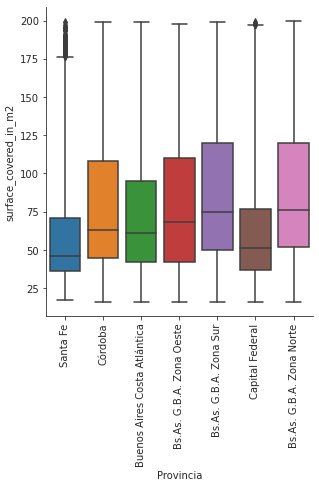

In [483]:
# Boxplot de las provincias p_sur y su superfie cubierta.

data_sup_cubierta = data_limpio_sin_outlier[data_limpio_sin_outlier["surface_covered_in_m2"] < 200]
with sns.axes_style(style='ticks'):
    g = sns.catplot("state_name", "surface_covered_in_m2", 
                    data = data_sup_cubierta.set_index(data_sup_cubierta["state_name"]).loc[p_sur], 
                    kind ="box", orient = "v", height = 5, whis = 3)
    g.set_axis_labels("Provincia", "surface_covered_in_m2");
    g.set_xticklabels(rotation=90)
    
    

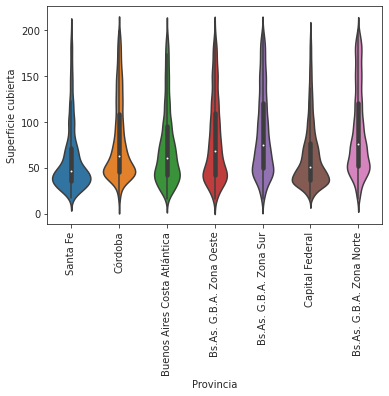

In [484]:
# Grafico de violin. Superficie cubierta.
data_sup_cubierta = data_limpio_sin_outlier[data_limpio_sin_outlier["surface_covered_in_m2"] < 200]
with sns.axes_style(style='ticks'):
    g = sns.violinplot("state_name", "surface_covered_in_m2", 
                    data = data_sup_cubierta.set_index(data_sup_cubierta["state_name"]).loc[p_sur], 
                    kind ="box", orient = "v", height = 5, whis = 3)
 
    g.set_xticklabels(p_sur,rotation=90)
    g.set(xlabel="Provincia", ylabel="Superficie cubierta")
   
    

In [485]:
data_limpio.columns

Index(['state_name', 'Unnamed: 0', 'property_type', 'country_name',
       'provincia_clean', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'price_clean_USD',
       'price_usd/m2_clean'],
      dtype='object')

Realizamos analisis tipo scater para ver si existe algun tipo de correlacion 

In [486]:
mask_capital = data_limpio.state_name == 'Capital Federal'
data_capital = data_limpio.loc[mask_capital]
data_capital_sin_out = data_capital[data_capital['price_clean_USD'] < 4000000]
data_capital.head(5)
print(data_capital.shape)
print(data_capital_sin_out.shape)


(27635, 12)
(25948, 12)


In [487]:
data_x = data_capital_sin_out.price_clean_USD
data_type = data_capital_sin_out.property_type
data_superficie = data_capital_sin_out.surface_total_in_m2
data_provincia = data_capital_sin_out.provincia_clean

In [488]:
data_x.shape

(25948,)

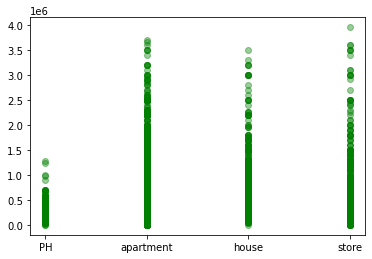

In [489]:
# fig = plt.figure()
# creo los axes
ax = plt.axes()
ax.scatter(data_type, data_x, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

Text(0, 0.5, 'price_clean_USD')

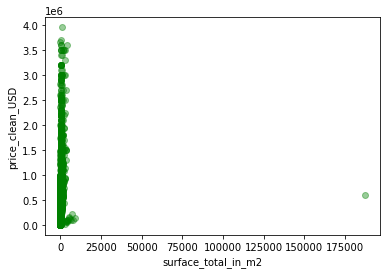

In [490]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
ax.scatter(data_superficie, data_x, marker = 'o', color = "green", label='serie sin', alpha = 0.4)
ax.set_xlabel("surface_total_in_m2")
ax.set_ylabel("price_clean_USD")

Text(0, 0.5, 'price_clean_USD')

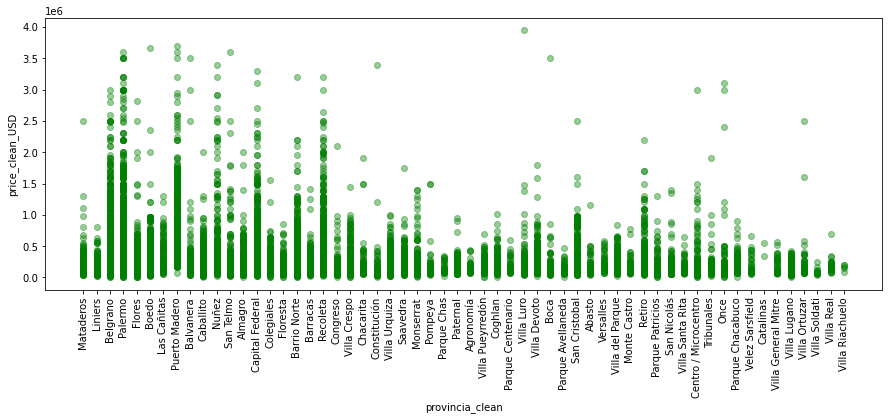

In [491]:
fig = plt.figure(figsize = (15,5))
# creo los axes
ax = plt.axes()
plt.xticks(rotation=90)
ax.scatter(data_provincia, data_x, marker = 'o', color = "green", label='serie sin', alpha = 0.4)
ax.set_xlabel("provincia_clean")
ax.set_ylabel("price_clean_USD")


In [492]:
data_limpio.head(1)

,state_name,Unnamed: 0,property_type,country_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
0,Capital Federal,0,PH,Argentina,Mataderos,55.0,40.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,1550.0


## Selección de state_name con las cuales trabajar

In [493]:
(data_limpio.property_type == "apartment").sum()

53848

In [494]:
contador=(data_limpio.surface_covered_in_m2.isnull()) & (data_limpio["price_usd/m2_clean"].isnull()) & (data_limpio["price_clean_USD"].isnull())
contador.sum()

373

In [495]:
data_limpio.state_name.value_counts().head(7).index

Index(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur',
       'Córdoba', 'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste',
       'Santa Fe'],
      dtype='object')

In [496]:
total_datos=data_limpio.state_name.value_counts().head(7).sum()
total_datos

90420

In [497]:
provincias_interes=data_limpio.state_name.value_counts().head(7).index
mascara_prov=[x in provincias_interes for x in data_limpio.state_name]
data_limpio_2=data_limpio[mascara_prov]

In [498]:
contador=(data_limpio_2["price_usd/m2_clean"].isnull()) & (data_limpio_2["price_clean_USD"].isnull())
a=contador.sum()
a

7884

In [499]:
contador=(data_limpio_2["surface_covered_in_m2"].isnull()) & (data_limpio_2["surface_total_in_m2"].isnull())
b=contador.sum()
b

4063

In [500]:
a+b

11947

In [501]:
((a+b)*100)/total_datos

13.212784782127848

In [502]:
#data_limpio_2.dropna(axis="index",subset=["price_usd/m2_clean","price_clean_USD"],how="all",inplace=True)
#data_limpio_2.dropna(axis="index",subset=["surface_covered_in_m2","surface_total_in_m2"],how="all",inplace=True)

In [503]:
data_limpio_2.head(2)

,state_name,Unnamed: 0,property_type,country_name,provincia_clean,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,price_clean_USD,price_usd/m2_clean
0,Capital Federal,0,PH,Argentina,Mataderos,55.0,40.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,1550.0
1,Bs.As. G.B.A. Zona Sur,1,apartment,Argentina,La Plata,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,150000.0,NaN


## Imputacion de valores faltantes

In [504]:
mask=(data_limpio_2.state_name=="Capital Federal")

In [505]:
data_limpio_2.loc[mask,"price_usd/m2_clean"].value_counts(60)

2500.000000     0.010014
3000.000000     0.007837
2000.000000     0.007639
3333.333333     0.003325
2400.000000     0.003087
                  ...   
2706.896552     0.000040
13870.967742    0.000040
3259.740260     0.000040
2860.366953     0.000040
2927.630197     0.000040
Name: price_usd/m2_clean, Length: 12189, dtype: float64

In [506]:
pd.pivot_table(data_limpio_2[mask],index=["state_name","provincia_clean","property_type"],aggfunc={"price_usd/m2_clean":['mean',"std"]})

price_usd/m2_clean  \
                                                             mean   
state_name      provincia_clean  property_type                      
Capital Federal Abasto           PH                   2018.689541   
                                 apartment            2334.800137   
                                 house                1682.692308   
                                 store                2243.062212   
                Agronomía        PH                   3857.432482   
...                                                           ...   
                Villa Urquiza    store                4504.535723   
                Villa del Parque PH                  10205.024352   
                                 apartment            2859.580608   
                                 house               20693.989255   
                                 store                7801.910155   

                                                              
                                                         std  
state_name      provincia_clean  property_type                
Capital Federal Abasto           PH               427.459954  
                                 apartment        545.948647  
                                 house             95.187451  
                                 store            526.543116  
                Agronomía        PH              5146.131395  
...                                                      ...  
                Villa Urquiza    store           4619.686000  
                Villa del Parque PH             35710.307388  
                                 apartment       5514.953549  
                                 house          76401.976410  
                                 store          10067.838970  

[219 rows x 2 columns]

In [507]:
data_limpio_2["surface_covered_in_m2"].isnull().sum()

5978

In [508]:
contador=(data_limpio_2["surface_covered_in_m2"].isnull()) & (data_limpio["price_clean_USD"].notnull()) 
contador.sum()

5719

In [509]:
contador=(data_limpio_2["surface_total_in_m2"].isnull()) & (data_limpio["price_clean_USD"].notnull()) 
contador.sum()

14251

In [510]:
# Funcion para imputar valores faltantas por la media formando bines
# Forma bines considerando provincia, tipo de propiedad y la columna columna_1
def imputacion(columna_1, columna_2):
    
    prov_clean = provincias_interes
    type_clean = data_limpio_2["property_type"].value_counts().index
    
    for pc in prov_clean:
        for tc in type_clean:
            # Mascara para provincia y tipo de propiedad
            new_mask = (data_limpio_2.state_name == pc) & (data_limpio_2.property_type == tc) 
            capital = data_limpio_2[new_mask]
            
            # Mascara para generar los tres bines con columna_1. No considera los valores extremos < 5%  ni mayores 
            # al 95% ya que son valores outliers
            mask_mean_0 = (capital[columna_1] >= capital[columna_1].quantile(0.65)) & (capital[columna_1] <= capital[columna_1].quantile(0.95))
            mask_mean_1 = (capital[columna_1] >= capital[columna_1].quantile(0.35)) & (capital[columna_1] < capital[columna_1].quantile(0.66))
            mask_mean_2 = (capital[columna_1] >= capital[columna_1].quantile(0.05)) & (capital[columna_1] < capital[columna_1].quantile(0.35))
            
            # Calcula la media para columna_2 de cada bin
            media_bin_0 = (capital.loc[mask_mean_0,columna_2].mean())
            media_bin_1 = (capital.loc[mask_mean_1,columna_2].mean())
            media_bin_2 = (capital.loc[mask_mean_2,columna_2].mean())
            
            # Imputa los valores faltantes
            data_limpio_2.loc[(mask_mean_0) & (new_mask),columna_2] = data_limpio_2.loc[(mask_mean_0) & (new_mask),columna_2].fillna(media_bin_0)
            data_limpio_2.loc[(mask_mean_1) & (new_mask),columna_2] = data_limpio_2.loc[(mask_mean_1) & (new_mask),columna_2].fillna(media_bin_1)
            data_limpio_2.loc[(mask_mean_2) & (new_mask),columna_2] = data_limpio_2.loc[(mask_mean_2) & (new_mask),columna_2].fillna(media_bin_2)

In [511]:
# Funcion para imputar valores faltantes en columna_2 por la media formando bines
# Forma bines considerando provincia, tipo de propiedad y la columna columna_1
def imputacion_2(columna_1, columna_2):
    
    prov_clean = provincias_interes # provincias con las que se trabaja
    type_clean = data_limpio_2["property_type"].value_counts().index

    for pc in prov_clean:
        for tc in type_clean:
            
            # Mascara para provincia, tipo de propiedad y valores de room que no sean nan
            new_mask = (data_limpio_2.state_name == pc) & (data_limpio_2.property_type == tc) & (data_limpio_2.rooms.notnull()) 
            capital = data_limpio_2[new_mask]
            
            # Mascara para generar los dos bines con columna_1. No considera los valores extremos < 5%  ni mayores 
            # al 95% ya que son valores outliers
            mask_mean_1 = (capital[columna_1] >= capital[columna_1].quantile(0.50)) & (capital[columna_1] < capital[columna_1].quantile(0.95))
            mask_mean_2 = (capital[columna_1] >= capital[columna_1].quantile(0.05)) & (capital[columna_1] < capital[columna_1].quantile(0.50))
            
             # Calcula la moda para columna_2 de cada bin
            moda_bin_1 = (capital.loc[mask_mean_1, columna_2].mode())
            moda_bin_2 = (capital.loc[mask_mean_2, columna_2].mode())
            
            # Imputa los valores faltantes en columna_2
            data_limpio_2.loc[(mask_mean_1) & (new_mask), columna_2] = data_limpio_2.loc[(mask_mean_1) & (new_mask), columna_2].fillna(moda_bin_1)
            data_limpio_2.loc[(mask_mean_2) & (new_mask), columna_2] = data_limpio_2.loc[(mask_mean_2) & (new_mask), columna_2].fillna(moda_bin_2)

In [512]:
# Cantidad de valores faltantes de superficie cubierta antes de la imputacion
data_limpio_2["surface_covered_in_m2"].isnull().sum()

5978

In [513]:
# Imputacion de superficie cubierta 
imputacion("price_clean_USD","surface_covered_in_m2")

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [514]:
# Cantidad de valores faltantes de superficie cubierta despues de la imputacion
mask=data_limpio_2["surface_covered_in_m2"].isnull()
mask.sum()

1139

In [515]:
# Tabla con porcentaje de valores faltantes por provincia para cada columna
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.058802,0.005211,0.505880,0.059635,0.085761,27635
Bs.As. G.B.A. Zona Norte,0.176260,0.011411,0.735563,0.037386,0.086275,21559
Bs.As. G.B.A. Zona Sur,0.323426,0.020959,0.798627,0.082212,0.188183,11069
Córdoba,0.360774,0.024404,0.669028,0.158794,0.289586,8892
Buenos Aires Costa Atlántica,0.122888,0.016385,0.237583,0.074501,0.171019,7812
Bs.As. G.B.A. Zona Oeste,0.181296,0.014368,0.464864,0.179075,0.258882,7656
Santa Fe,0.093497,0.010695,0.646541,0.199241,0.241332,5797


In [516]:
# Imputacion de valores faltantes de precio 
imputacion("surface_covered_in_m2","price_clean_USD")

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [517]:
# Tabla con porcentaje de valores faltantes por provincia para cada columna
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.058802,0.005211,0.505880,0.007708,0.085761,27635
Bs.As. G.B.A. Zona Norte,0.176260,0.011411,0.735563,0.006216,0.086275,21559
Bs.As. G.B.A. Zona Sur,0.323426,0.020959,0.798627,0.014726,0.188183,11069
Córdoba,0.360774,0.024404,0.669028,0.026428,0.289586,8892
Buenos Aires Costa Atlántica,0.122888,0.016385,0.237583,0.019457,0.171019,7812
Bs.As. G.B.A. Zona Oeste,0.181296,0.014368,0.464864,0.023642,0.258882,7656
Santa Fe,0.093497,0.010695,0.646541,0.029843,0.241332,5797


In [518]:
# Dropeo de filas que cuenten con valores nulos en ambos precios o en ambas superficies
data_limpio_2.dropna(axis="index",subset=["price_usd/m2_clean","price_clean_USD"],how="all",inplace=True)
data_limpio_2.dropna(axis="index",subset=["surface_covered_in_m2","surface_total_in_m2"],how="all",inplace=True)

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [519]:
# Cantidad de datos luego del dropeo
data_limpio_2.shape[0]

88513

In [520]:
# Cantidad total de valores nulos de superficie cubierta
mask=data_limpio_2["surface_covered_in_m2"].isnull()
mask.sum()

224

In [521]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.056628,0.001170,0.504387,0.0,0.076369,27354
Bs.As. G.B.A. Zona Norte,0.172661,0.005533,0.734302,0.0,0.076249,21325
Bs.As. G.B.A. Zona Sur,0.317375,0.002882,0.795296,0.0,0.164637,10757
Córdoba,0.350124,0.000354,0.673115,0.0,0.254807,8477
Buenos Aires Costa Atlántica,0.116135,0.003296,0.232797,0.0,0.146322,7586
Bs.As. G.B.A. Zona Oeste,0.176963,0.001349,0.463313,0.0,0.234691,7414
Santa Fe,0.090893,0.000893,0.640714,0.0,0.214643,5600


In [522]:
# Relleno de valores faltantes de superficie total de departamentos con valores
# de superficie cubierta de departamentos
contador=(data_limpio_2.property_type == "apartment") & (data_limpio_2.surface_total_in_m2.isnull()) & (data_limpio_2.surface_covered_in_m2>0)
contador.sum()
data_limpio_2.loc[contador,"surface_total_in_m2"]=data_limpio_2.loc[contador,"surface_covered_in_m2"]

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [523]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.046904,0.001170,0.504387,0.0,0.076369,27354
Bs.As. G.B.A. Zona Norte,0.164830,0.005533,0.734302,0.0,0.076249,21325
Bs.As. G.B.A. Zona Sur,0.297946,0.002882,0.795296,0.0,0.164637,10757
Córdoba,0.286540,0.000354,0.673115,0.0,0.254807,8477
Buenos Aires Costa Atlántica,0.087398,0.003296,0.232797,0.0,0.146322,7586
Bs.As. G.B.A. Zona Oeste,0.160777,0.001349,0.463313,0.0,0.234691,7414
Santa Fe,0.071786,0.000893,0.640714,0.0,0.214643,5600


In [524]:
# Imputacion  de valores faltantes de superficie total
imputacion("price_clean_USD","surface_total_in_m2")

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [525]:
mask = data_limpio_2["price_usd/m2_clean"].isnull()

In [526]:
# Obtencion de precio/m2 con precio y superficie cubierta
data_limpio_2.loc[mask,"price_usd/m2_clean"]=data_limpio_2.loc[mask,"price_clean_USD"]/data_limpio_2.loc[mask,"surface_covered_in_m2"]

In [527]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.003875,0.001170,0.504387,0.0,0.001170,27354
Bs.As. G.B.A. Zona Norte,0.016319,0.005533,0.734302,0.0,0.005533,21325
Bs.As. G.B.A. Zona Sur,0.027610,0.002882,0.795296,0.0,0.002882,10757
Córdoba,0.038103,0.000354,0.673115,0.0,0.000354,8477
Buenos Aires Costa Atlántica,0.007118,0.003296,0.232797,0.0,0.003296,7586
Bs.As. G.B.A. Zona Oeste,0.014837,0.001349,0.463313,0.0,0.001349,7414
Santa Fe,0.010179,0.000893,0.640714,0.0,0.000893,5600


In [528]:
data_limpio_2.loc[:,"rooms"].mode()

0    3.0
dtype: float64

In [529]:
# Media de rooms por tipo de propiedad
pd.pivot_table(data_limpio_2,index="property_type",aggfunc={"rooms":"mean"})

,rooms
property_type,
PH,3.262454
apartment,2.512589
house,4.389799
store,2.333333


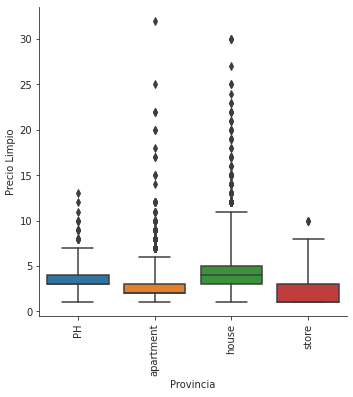

In [530]:
# Grafico boxplot de precio para cada tipo de propiedad
with sns.axes_style(style='ticks'):
    g = sns.catplot("property_type", "rooms", 
                    data = data_limpio_2, 
                    kind ="box", orient = "v", height = 5, whis = 3)
    g.set_axis_labels("Provincia", "Precio Limpio");
    g.set_xticklabels(rotation=90)

In [531]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.003875,0.001170,0.504387,0.0,0.001170,27354
Bs.As. G.B.A. Zona Norte,0.016319,0.005533,0.734302,0.0,0.005533,21325
Bs.As. G.B.A. Zona Sur,0.027610,0.002882,0.795296,0.0,0.002882,10757
Córdoba,0.038103,0.000354,0.673115,0.0,0.000354,8477
Buenos Aires Costa Atlántica,0.007118,0.003296,0.232797,0.0,0.003296,7586
Bs.As. G.B.A. Zona Oeste,0.014837,0.001349,0.463313,0.0,0.001349,7414
Santa Fe,0.010179,0.000893,0.640714,0.0,0.000893,5600


In [532]:
mask=(data_limpio_2.surface_total_in_m2.isnull()==True) & (data_limpio_2.surface_covered_in_m2.isnull()==False)

In [533]:
# Iguala la superficie total faltante a superficie cubierta
data_limpio_2.loc[mask,"surface_total_in_m2"]=data_limpio_2.loc[mask,"surface_covered_in_m2"]

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [534]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.0,0.001170,0.504387,0.0,0.001170,27354
Bs.As. G.B.A. Zona Norte,0.0,0.005533,0.734302,0.0,0.005533,21325
Bs.As. G.B.A. Zona Sur,0.0,0.002882,0.795296,0.0,0.002882,10757
Córdoba,0.0,0.000354,0.673115,0.0,0.000354,8477
Buenos Aires Costa Atlántica,0.0,0.003296,0.232797,0.0,0.003296,7586
Bs.As. G.B.A. Zona Oeste,0.0,0.001349,0.463313,0.0,0.001349,7414
Santa Fe,0.0,0.000893,0.640714,0.0,0.000893,5600


In [535]:
# Imputa valores faltantes de rooms por la moda
imputacion_2("surface_total_in_m2","rooms")

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [536]:
data_limpio_2.loc[:,"rooms"].isnull().sum()

52506

In [537]:
data_pivot_clean = data_limpio_2.pivot_table('rooms', index= 'state_name', columns='property_type')
data_pivot_clean

property_type,PH,apartment,house,store
state_name,,,,
Bs.As. G.B.A. Zona Norte,3.233728,2.535299,4.439471,1.800000
Bs.As. G.B.A. Zona Oeste,3.157500,2.317186,3.631171,2.666667
Bs.As. G.B.A. Zona Sur,3.083682,2.516129,4.174202,2.000000
Buenos Aires Costa Atlántica,2.859857,2.352486,4.251270,1.750000
Capital Federal,3.625000,2.581916,4.715517,2.400000
Córdoba,2.610837,2.755403,5.650587,2.562500
Santa Fe,3.680000,2.334830,3.815421,NaN


In [538]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,rooms,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.0,0.001170,0.504387,0.0,0.001170,27354
Bs.As. G.B.A. Zona Norte,0.0,0.005533,0.734302,0.0,0.005533,21325
Bs.As. G.B.A. Zona Sur,0.0,0.002882,0.795296,0.0,0.002882,10757
Córdoba,0.0,0.000354,0.673115,0.0,0.000354,8477
Buenos Aires Costa Atlántica,0.0,0.003296,0.232797,0.0,0.003296,7586
Bs.As. G.B.A. Zona Oeste,0.0,0.001349,0.463313,0.0,0.001349,7414
Santa Fe,0.0,0.000893,0.640714,0.0,0.000893,5600


In [539]:
data_limpio_2=data_limpio_2.drop(columns="rooms")

In [540]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.0,0.001170,0.0,0.001170,27354
Bs.As. G.B.A. Zona Norte,0.0,0.005533,0.0,0.005533,21325
Bs.As. G.B.A. Zona Sur,0.0,0.002882,0.0,0.002882,10757
Córdoba,0.0,0.000354,0.0,0.000354,8477
Buenos Aires Costa Atlántica,0.0,0.003296,0.0,0.003296,7586
Bs.As. G.B.A. Zona Oeste,0.0,0.001349,0.0,0.001349,7414
Santa Fe,0.0,0.000893,0.0,0.000893,5600


In [541]:
# Dropea filas que contengan algun valor nulo en las columnas indicadas
data_limpio_2=data_limpio_2.dropna(subset = ["surface_total_in_m2", "surface_covered_in_m2", "price_clean_USD", "price_usd/m2_clean"], how="any", axis="index")

In [542]:
crear_tablas_porcentual_nulos(data_limpio_2)

,surface_total_in_m2,surface_covered_in_m2,price_clean_USD,price_usd/m2_clean,cantidad_datos
Capital Federal,0.0,0.0,0.0,0.0,27322
Bs.As. G.B.A. Zona Norte,0.0,0.0,0.0,0.0,21207
Bs.As. G.B.A. Zona Sur,0.0,0.0,0.0,0.0,10726
Córdoba,0.0,0.0,0.0,0.0,8474
Buenos Aires Costa Atlántica,0.0,0.0,0.0,0.0,7561
Bs.As. G.B.A. Zona Oeste,0.0,0.0,0.0,0.0,7404
Santa Fe,0.0,0.0,0.0,0.0,5595


In [543]:
data_limpio_2.shape

(88289, 11)

C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\samir\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


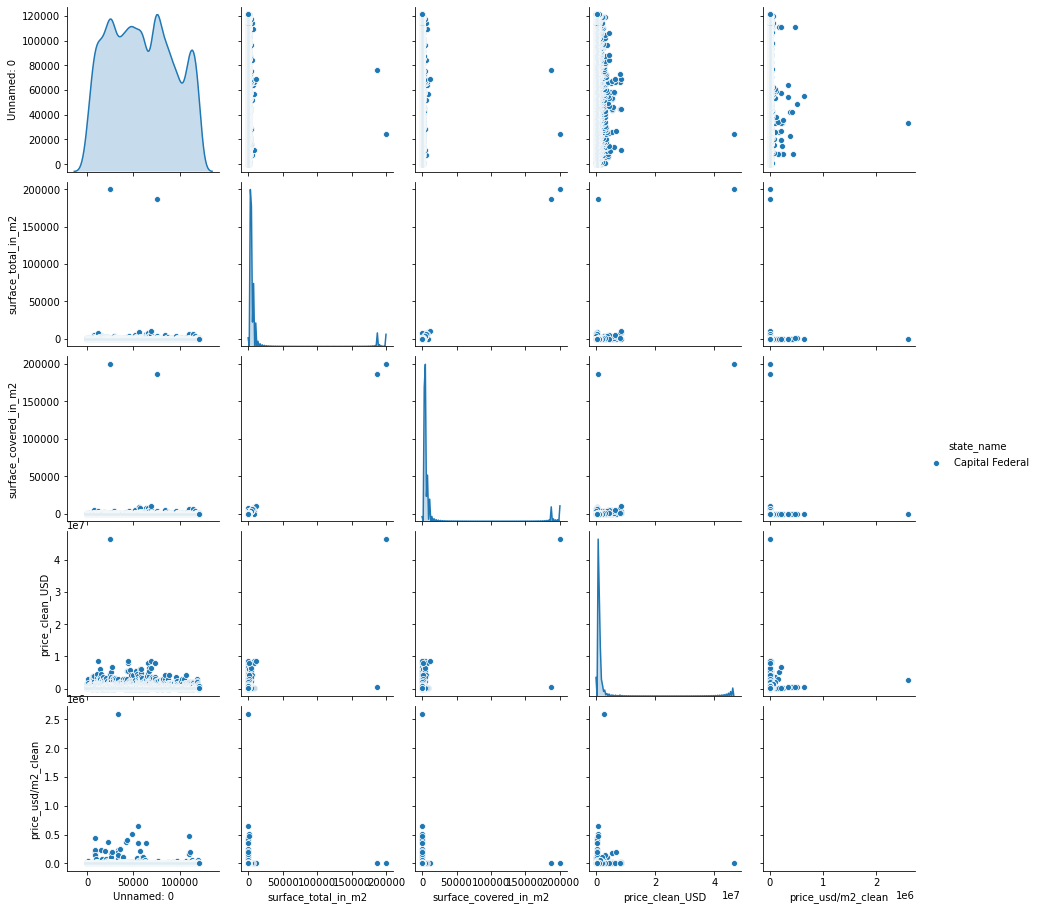

In [544]:
sns.pairplot(data_limpio_2[data_limpio_2.state_name=="Capital Federal"], hue='state_name', height=2.5);

In [545]:
data_limpio_2.describe()

,Unnamed: 0,surface_total_in_m2,surface_covered_in_m2,price_clean_USD,price_usd/m2_clean
count,88289.000000,88289.000000,88289.000000,8.828900e+04,8.828900e+04
mean,58838.146406,224.495082,133.955944,2.437233e+05,inf
std,34499.134171,1519.233089,1008.460583,3.526869e+05,NaN
min,0.000000,0.000000,0.000000,4.666620e+03,1.000000e+00
25%,28791.000000,52.000000,47.000000,9.556800e+04,1.379310e+03
50%,58000.000000,91.000000,77.000000,1.550000e+05,1.919787e+03
75%,88340.000000,250.000000,151.000000,2.800000e+05,2.683636e+03
max,121219.000000,200000.000000,200000.000000,4.654544e+07,inf


In [557]:
# Funcion para eliminar outliers de columna_1 para cada provincia y tipo de propiedad
def imputacion_3(columna_1):
    
    prov_clean = provincias_interes # provincias con las que se trabaja
    type_clean = data_limpio_2["property_type"].value_counts().index

    for pc in prov_clean:
        for tc in type_clean:
            
            # Mascara para provincia y tipo de propiedad
            new_mask = (data_limpio_2.state_name == pc) & (data_limpio_2.property_type == tc)
            capital = data_limpio_2[new_mask]
            
            # Toma los cuantiles correspondientes al 25% y al 75%
            q = capital[columna_1].quantile([0.25, 0.75])
            
            # Calculamos los extremos de los bigotes del boxplot
            vmin = q[0.25] - (q[0.75] - q[0.25]) * 1.5
            vmax = q[0.75] + (q[0.75] - q[0.25]) * 1.5
            
            # Mascara de valores outliers, es decir, que se encuentren mas allá 
            # de los valores extremos
            mask_outliers = (capital[columna_1] < vmin) | (capital[columna_1] > vmax)
            
            # Dropeo outliers
            data_limpio_2[new_mask]=data_limpio_2[new_mask].drop(axis = 0, index = data_limpio_2[(mask_outliers) & (new_mask)].index)

In [558]:
print(data_limpio_2.isnull().sum())
data_limpio_2.shape

state_name               0
Unnamed: 0               0
property_type            0
country_name             0
provincia_clean          0
surface_total_in_m2      0
surface_covered_in_m2    0
description              2
title                    0
price_clean_USD          0
price_usd/m2_clean       0
dtype: int64


(88289, 11)

In [559]:
# Eliminacion de outliers en las columnas indicadas
for x in ['surface_total_in_m2', 'surface_covered_in_m2','price_clean_USD', 'price_usd/m2_clean']:
    imputacion_3(x)

In [562]:
data_limpio_2.dropna(axis = "index", how="any").shape

(72817, 11)

In [563]:
data_limpio_2.isnull().sum()

state_name               15470
Unnamed: 0               15470
property_type            15470
country_name             15470
provincia_clean          15470
surface_total_in_m2      15470
surface_covered_in_m2    15470
description              15472
title                    15470
price_clean_USD          15470
price_usd/m2_clean       15470
dtype: int64

In [239]:
data_limpio_2.describe()

,Unnamed: 0,surface_total_in_m2,surface_covered_in_m2,price_clean_USD,price_usd/m2_clean
count,72819.000000,72819.000000,72819.000000,72819.000000,72819.000000
mean,59715.724564,161.321580,103.395105,175135.666834,1963.071475
std,34541.556898,180.962795,84.391736,124380.651376,854.400930
min,0.000000,0.000000,1.000000,4952.450000,25.913234
25%,30178.500000,50.000000,45.000000,90000.000000,1346.153846
50%,59571.000000,79.000000,70.000000,138000.000000,1829.065789
75%,89197.000000,220.000000,136.425113,220000.000000,2458.830061
max,121219.000000,1500.000000,780.000000,920000.000000,8125.000000


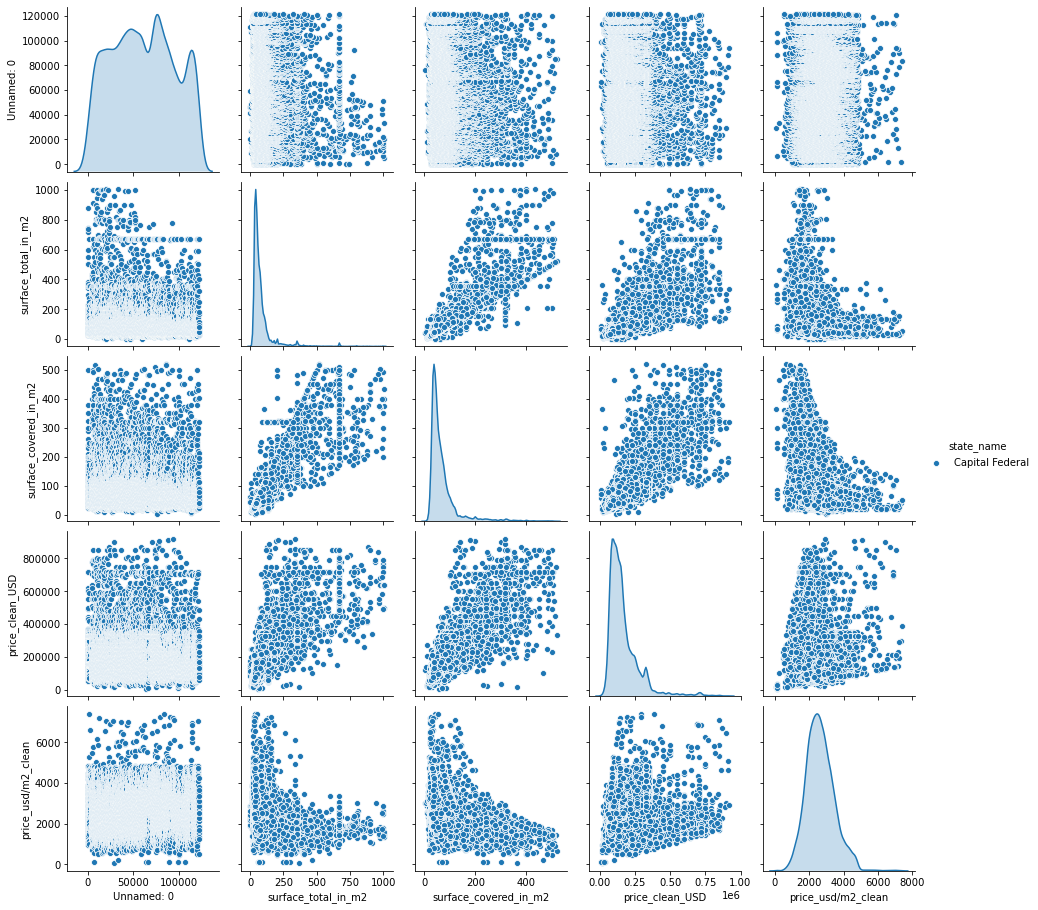

In [240]:
sns.pairplot(data_limpio_2[data_limpio_2.state_name=="Capital Federal"], hue='state_name', height=2.5);

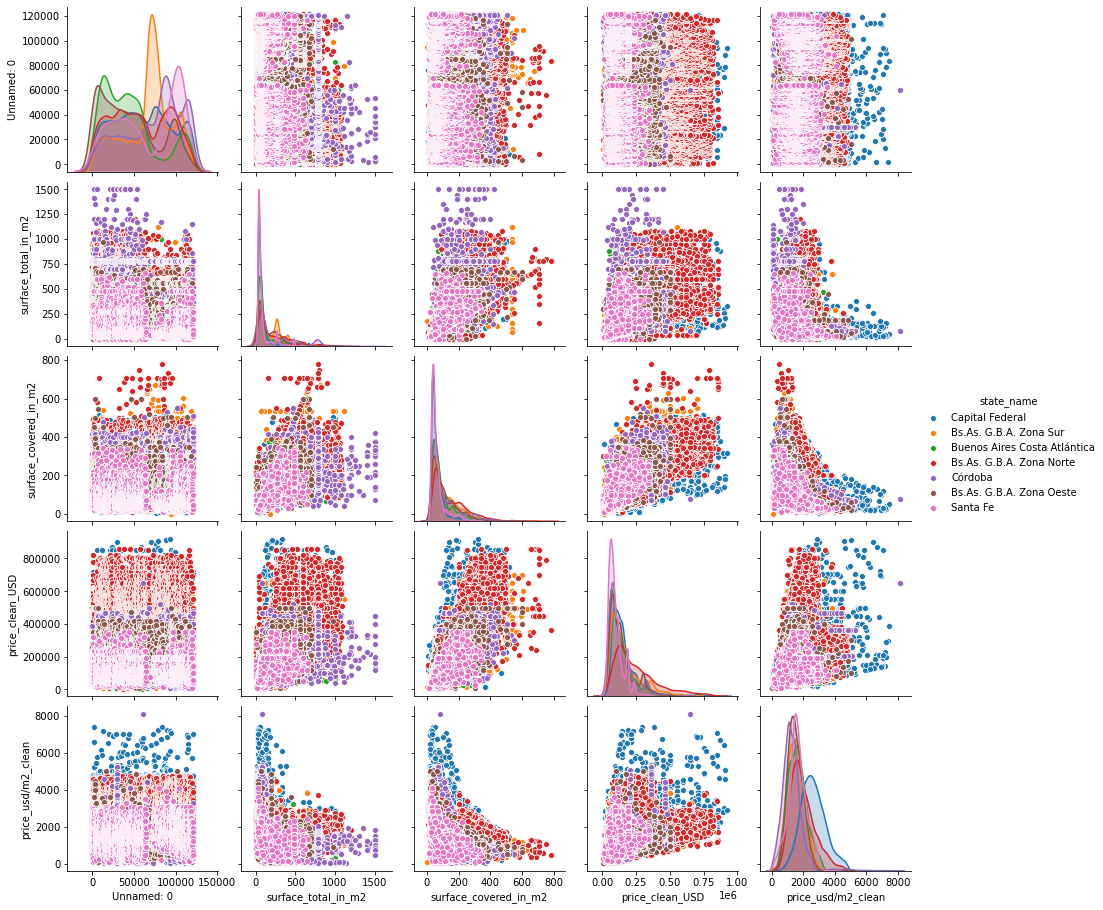

In [241]:
sns.pairplot(data_limpio_2, hue='state_name', height=2.5);